# Análisis de regresión lineal multiple

In [ ]:

install.packages(c("rstatix", "e1071", "olsrr", "QuantPsyc", "ggpubr"))

library(tidyverse)
library(rstatix)
library(olsrr)
library(QuantPsyc)
library(ggpubr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘proxy’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




# Ejercicio

Estudio con 72 estudiantes: se plantea que tanto el afrontamiento centrado en el problema como el centrado en la emoción predicen el estrés académico percibido.

Hipótesis de estudio: el afrontamiento centrado en el problema predice un menor estrés académico mientras que el centrado en la emoción predice un mayor estrés.

HT: el afrontamiento centrado en el problema es un predictor negativo y el afrontamiento centrado en la emoción es un predictor positivo del estrés académico.

- $H_{0}$: $β_{problema} = 0$, $β_{emocion} = 0$
- $H_{1}$: $β_{problema} < 0$, $β_{emocion} > 0$

Ecuación del modelo de regresión lineal múltiple:

Estrés académico = $β_{0} - β_{1}ACP + β_{2}ACE \pm \epsilon$

# Visualización de datos

In [ ]:
data <- haven::read_sav("https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase9_BaseRegresionLinealSimpleYMultiple.sav")
print(data, n = 10)

# A tibble: 72 × 8
   Código Sexo       Relación HistVinc Afroproblema Afroemoción Estrés_académico
   <chr>  <dbl+lbl>  <dbl+lb>    <dbl>        <dbl>       <dbl>            <dbl>
 1 001    2 [Femeni… 1 [Si]          6         29.2          38               45
 2 002    2 [Femeni… 0 [No]          7         23.8          45               45
 3 003    2 [Femeni… 0 [No]          8         24.6          50               45
 4 004    2 [Femeni… 0 [No]          5         21.5          45               45
 5 005    2 [Femeni… 1 [Si]          8         30            49               44
 6 006    2 [Femeni… 1 [Si]          6         33.1          48               44
 7 007    1 [Mascul… 0 [No]          6         31.5          44               43
 8 008    1 [Mascul… 1 [Si]         11         21.5          36               43
 9 009    2 [Femeni… 0 [No]          8         22.3          35               43
10 010    2 [Femeni… 1 [Si]          8         23.8          32               42
# ℹ 62 mo

`geom_smooth()` using formula = 'y ~ x'


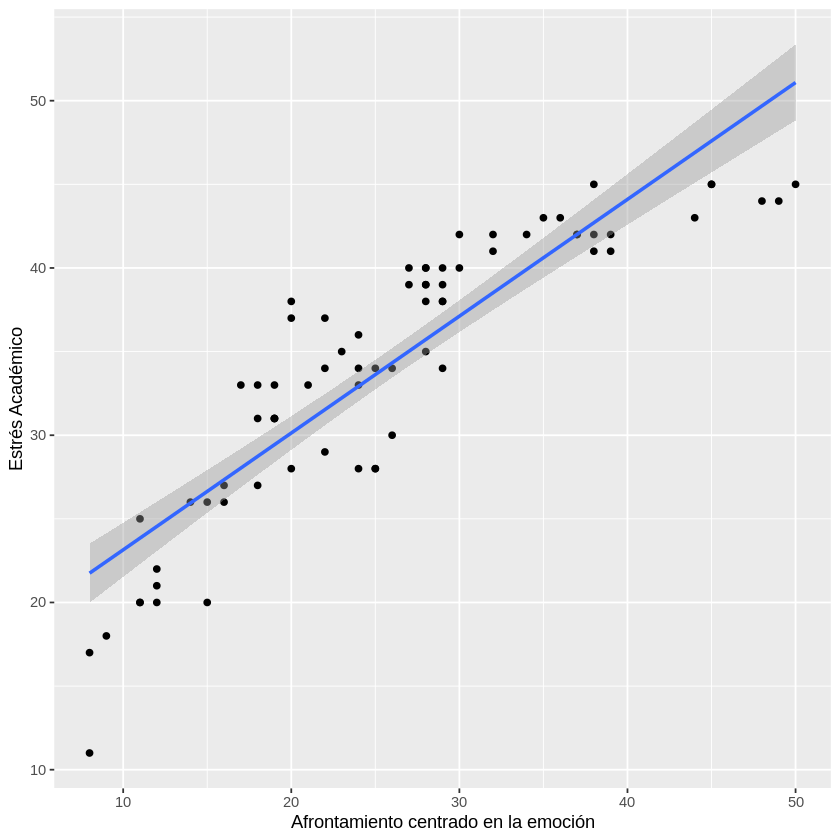

In [ ]:
data %>%
  ggplot(aes(x = Afroemoción, y = Estrés_académico)) +
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Afrontamiento centrado en la emoción",
       y = "Estrés Académico")

`geom_smooth()` using formula = 'y ~ x'


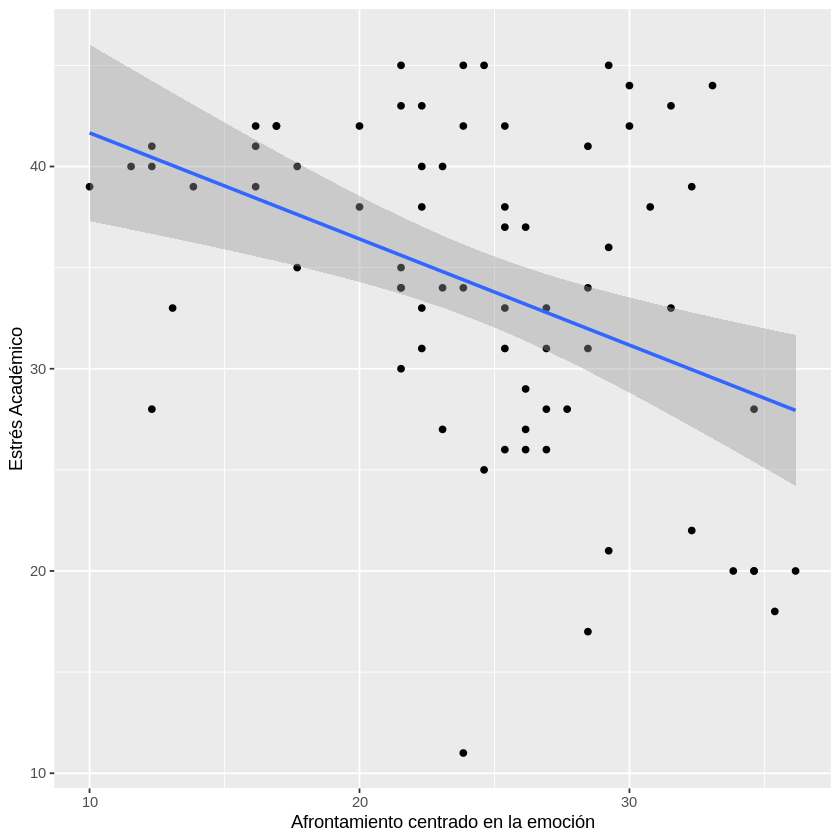

In [ ]:
data %>%
  ggplot(aes(x = Afroproblema, y = Estrés_académico)) +
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Afrontamiento centrado en la emoción",
       y = "Estrés Académico")

# Verificación de supuestos

## Evaluar normalidad de distribuciones

In [ ]:
data %>%
  shapiro_test(Estrés_académico, Afroemoción, Afroproblema)

variable,statistic,p
<chr>,<dbl>,<dbl>
Afroemoción,0.9712212,0.097620243
Afroproblema,0.9741042,0.143365606
Estrés_académico,0.9359159,0.001187091


In [ ]:
data |>
  summarise(Asimetría = e1071::skewness(Estrés_académico, type = 2),
            Kurtosis = e1071::kurtosis(Estrés_académico, type = 2))

Asimetría,Kurtosis
<dbl>,<dbl>
-0.7121525,-0.2086931


El análisis de normalidad indica que las distribuciones de afrontamiento centrado en el problema, SW = .974, p = .143, y de afrontamiento centrado en la emoción, SW = .971, p = .098, son normales. Si bien la distribución de estrés académico no es normal, SW = .936, p = .001, de acuerdo a la asimetría y curtosis estandarizadas se puede considerar no problemática, por lo que se usará el índice de correlación paramétrico de Pearson.

https://www.ibm.com/support/pages/node/421769

# Evaluar evidencias de relación

In [ ]:
data %>%
  cor_test(vars = "Afroproblema",
  vars2 = c("Afroemoción", "Estrés_académico"))

var1,var2,cor,statistic,p,conf.low,conf.high,method
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Afroproblema,Afroemoción,-0.30,-2.605528,0.01120,-0.4949129,-0.07052496,Pearson
Afroproblema,Estrés_académico,-0.41,-3.750489,0.00036,-0.5852579,-0.19595147,Pearson


Los resultados del análisis de correlación muestran una relación estadísticamente significativa, negativa y mediana, según el criterio de Cohen (1988), entre afrontamiento centrado en el problema y estrés académico, r(70) = -.41, p < .001 (unilateral).

A su vez, se observa una relación estadísticamente significativa, positiva y grande, según el criterio de Cohen (1988), entre afrontamiento centrado en la emoción y estrés académico, r(70) = .89, p< .001 (unilateral).

Así, se cumple con el supuesto de linealidad entre las variables de estudio.

# Análisis del modelo

In [ ]:
data %>%
  lm("Estrés_académico ~ Afroproblema + Afroemoción", data = .) -> model3

# Verificación de supuestos

## Normalidad de residuos

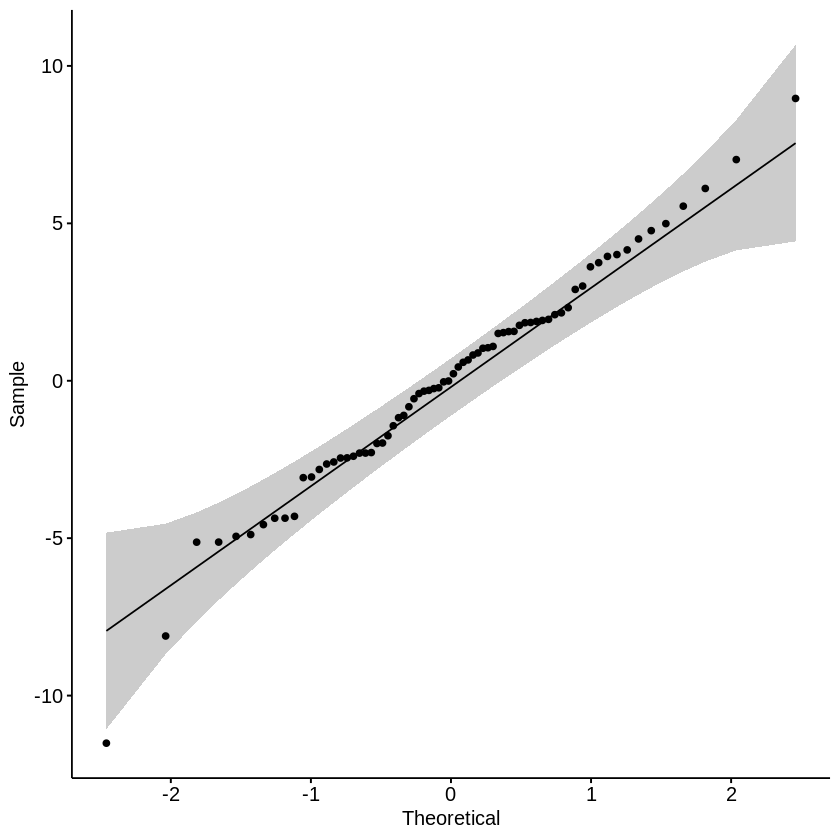

In [ ]:
tibble(residuals = model3$residuals) %>%
  ggpubr::ggqqplot(x = "residuals")

In [ ]:
model3$residuals %>%
  shapiro_test()

variable,statistic,p.value
<chr>,<dbl>,<dbl>
.,0.9848906,0.5430686


La prueba de Shapiro-Wilk fue de SW = .985, p = .543, por lo que se puede decir que los residuos del modelo presentan distribución normal.

# Independencia o no multicolinealidad

In [ ]:
ols_vif_tol(model3)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
Afroproblema,0.9115916,1.096982
Afroemoción,0.9115916,1.096982


- Afrontamiento centrado en problemas: Tolerancia = .91 (> .20), VIF = 1.10 (< 3)
- Afrontamiento centrado en emoción:    Tolerancia = .91 (> .20), VIF = 1.10  (< 3)

Los resultados sugieren que ambas variables predictoras, afrontamiento centrado en el problema y centrado en la emoción, no tienen una relación lineal entre sí, por lo que se cumple con el supuesto de independencia de variables.

# Evaluación del modelo de regresión

In [ ]:
model3 %>% broom::glance()

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8115395,0.8060769,3.566323,148.5622,9.887893e-26,2,-192.1819,392.3639,401.4706,877.5874,69,72


In [ ]:
model3 %>% broom::tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),22.0875997,2.33470849,9.460539,4.360741e-14
Afroproblema,-0.2040813,0.07021523,-2.906511,4.909814e-03
Afroemoción,0.6612553,0.04305651,15.357849,5.936729e-24


El coeficiente de determinación ajustado fue R2= .806, es decir, el 80.6% de la variación que se observa en estrés académico es explicado por el afrontamiento centrado en el problema y el centrado en la emoción. Según el criterio de Cohen (1988) el R2 es grande.

El resultado del análisis ANOVA fue F(2,69) = 148.56, p < .001, por lo que se puede decir que el modelo es adecuado. Al menos una de las VI es un predictor significativo del estrés académico.

El análisis de regresión lineal múltiple indica que el $β_{0}=22.09$, $β_{afront.problema}= -0.204$, $p=.002$ (unilateral) y $β_{afront.emoción}=0.661$, $p<.001$ (unilateral).

En el caso del afrontamiento centrado en el problema se encontró que predice de manera inversa y significativa al estrés académico. A cada incremento de una unidad en afrontamiento problema se observa una disminución de 0.204 en estrés académico.

Por su parte, el afrontamiento centrado en la emoción predice de manera directa y significativa al estrés académico. Por cada unidad adicional de afrontamiento emoción, se observa un aumento de 0.661 en estrés académico. Por todo ello se concluye que se cumple la HT de las investigadoras.

Estrés académico = 22.09 - 0.204(afrontamiento problema) + 0.661(afrontamiento emoción) + 3.57

In [ ]:
lm.beta(model3) %>% enframe()

name,value
<chr>,<dbl>
Afroproblema,-0.1590953
Afroemoción,0.8406513


De acuerdo a los betas estandarizados, el afrontamiento centrado en la emoción es más importante que el afrontamiento centrado en el problema en el modelo de predicción del estrés académico.

$β_{afront.emoción} = .841 > β_{afront.problema} = .159$